In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import os
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image
from torch.autograd import Variable

In [13]:
#image directory
data_dir = 'data/input/'

test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])
                                     ])


In [10]:
#model loading
model = models.resnet50()
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
model.load_state_dict(torch.load('models/binaries/ResNet50_nsfw_model.pth',map_location='cpu'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
#prediction function
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor.cuda()

    input = Variable(image_tensor)
    output = model(input)
    index = output.data.numpy().argmax()
    return index

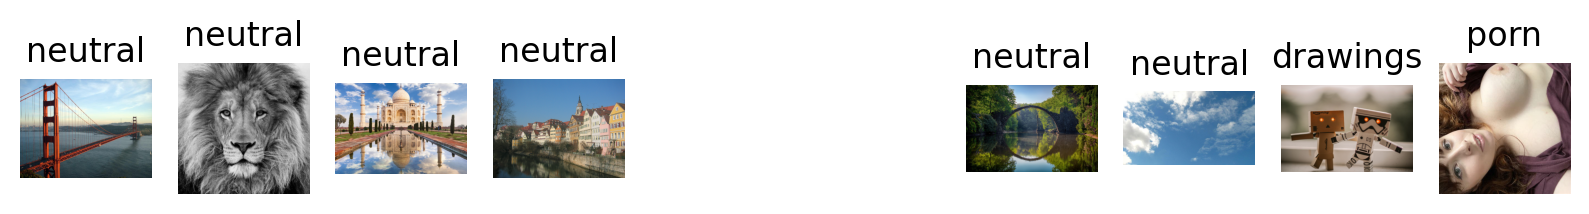

In [17]:
#model classes
classes=['drawings', 'hentai', 'neutral', 'porn', 'sexy']

#load images
entries = os.listdir(data_dir)

fig=plt.figure(figsize=(10,10))
i=0

for entry in entries:
    i+=1
    try:
        image = Image.open(data_dir+entry)
        
        #prediction
        index = predict_image(image)
        
        sub = fig.add_subplot(1, len(entries), i)
        sub.set_title(classes[index])
        plt.axis('off')
        plt.imshow(image)
    except:
        pass
plt.show()